In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/Lenovo/Desktop/Machify Course/2-Data Analysis/Lecture 12- intro to visualization/dataset_nan (1).csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
data['tenure'].describe()

count    6896.000000
mean       33.041473
std        24.382260
min         1.000000
25%        10.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [5]:
data.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data['Contract'].describe()

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object

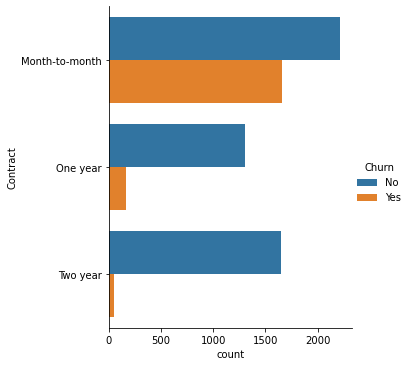

In [7]:
sns.catplot(y="Contract", hue='Churn', kind="count", data=data)

There is a High Turnover Rate Among Month to Month Customers. 

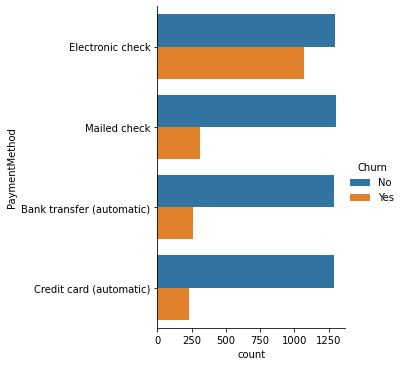

In [175]:
sns.catplot(y="PaymentMethod", hue='Churn', kind="count", data=data, )



Low Turnover Rate among automated Bank Transfer & Credit Card

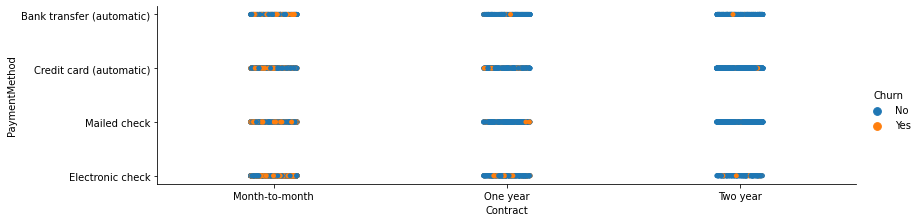

In [41]:
sns.catplot(y="PaymentMethod",x="Contract", hue='Churn', data=data,aspect=4,height=3)

As a conclusion from all the above:
an annual offer can be announced with a discount for paying with Credit Card to attain customer loyalty

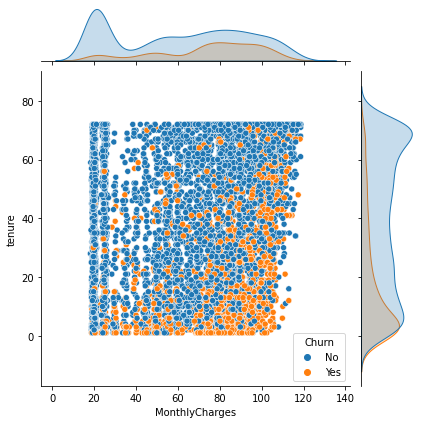

In [10]:
sns.jointplot(x='MonthlyCharges',y='tenure', hue='Churn' , data=data,kind='scatter')

It's Noticed here a high turover rate at Monthly charge 70 and above and at the same time if the customer stayed for more than 12 then he's more likely to stay with the company.

In [146]:
data.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='PhoneService', ylabel='MonthlyCharges'>

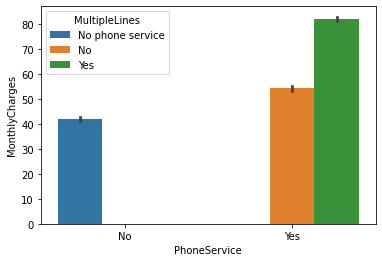

In [163]:
sns.barplot(y="MonthlyCharges", x="PhoneService", data=data,hue='MultipleLines')

<AxesSubplot:xlabel='PhoneService', ylabel='MonthlyCharges'>

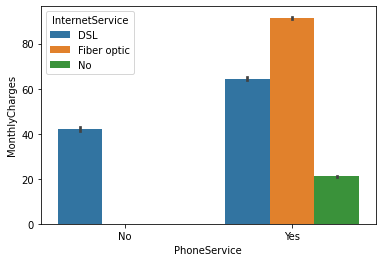

In [164]:
sns.barplot(y="MonthlyCharges", x="PhoneService", data=data,hue='InternetService')

<AxesSubplot:xlabel='StreamingTV', ylabel='MonthlyCharges'>

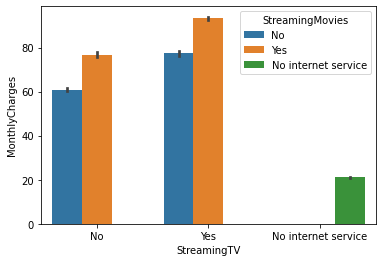

In [171]:
sns.barplot(y="MonthlyCharges", x="StreamingTV", data=data,hue='StreamingMovies')

it's Noticed from the last 3 graphs that (StreamingMovies,StreamingTV,PhoneService,InternetService,MultipleLines) are the key factors to bring up the bills for more than 70 which is critical as stated before, so it's suggested to make a bundle offer annually for under 70 monthly to reach high customers loyalty

In [242]:
def offer(insights):
    if  insights['Contract']==('One year') or insights['Contract']==('Two year'):
        if insights['PhoneService']=='Yes' and insights['MultipleLines']=='Yes' and insights['StreamingTV']=='Yes'and insights['StreamingMovies']=='Yes':
            return 'TV & Phone Bundle'
        elif insights['PhoneService']=='Yes' and insights['MultipleLines']=='Yes': 
            return 'Phone Bundle Offer'
        elif insights['StreamingTV']=='Yes'and insights['StreamingMovies']=='Yes':
            return 'TV Bundle Offer'
    else:
        return 'Not Eligible'

In [243]:
data['offer']=data.apply(offer,axis=1)

In [244]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,offer
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,TV & Phone Bundle
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,TV & Phone Bundle
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Not Eligible
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Not Eligible
7042,3186-AJIEK,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,TV Bundle Offer


In [245]:
data.iloc[1:40]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,offer
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,None
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Not Eligible
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,None
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Not Eligible
5,9305-CDSKC,Female,NaN,No,No,8.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Not Eligible
6,1452-KIOVK,Male,NaN,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Not Eligible
7,6713-OKOMC,Female,NaN,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,Not Eligible
8,7892-POOKP,Female,NaN,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Not Eligible
9,6388-TABGU,Male,NaN,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,None
10,9763-GRSKD,Male,NaN,Yes,Yes,13.0,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,Not Eligible
